<a href="https://colab.research.google.com/github/AnaPaulaSouza/wit_test/blob/master/wit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


Carregando os dados

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacaoes_treino), (imagens_teste, identificacaoes_teste)) = dataset.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Exploração os dados


In [ ]:
len(imagens_teste)
imagens_treino.shape
imagens_teste.shape
len(identificacaoes_teste)
identificacaoes_treino.min()
identificacaoes_treino.max()

9

Exibição dos dados

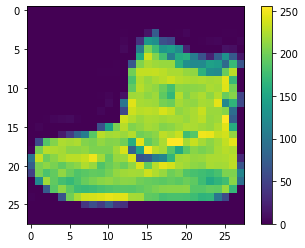

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casado', 'Sandália', 'Camisa', 
                           'Tênis', 'Bolsa', 'Bota'
                         ]
# plt.imshow(imagens_treino[0])
# plt.title(identificacaoes_treino[0])

# for imagem in range(10):
#   plt.subplot(2, 5, imagem+1)
#   plt.imshow(imagens_treino[imagem])
#   plt.title(nomes_de_classificacoes[identificacaoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

Ensinando o modelo

In [27]:
#camada 0 - entrada
#camada 1 - processamento
#camada 2 - saida

#normalização --- A4
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#Compilando o modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Treinando o modelo
historico = modelo.fit(imagens_treino, identificacaoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy:

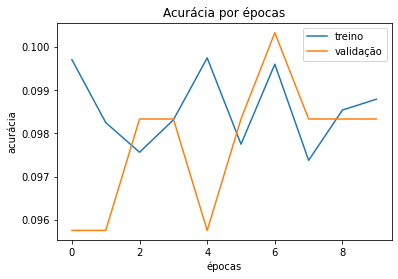

In [28]:
#Histórico em gráfico da Acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

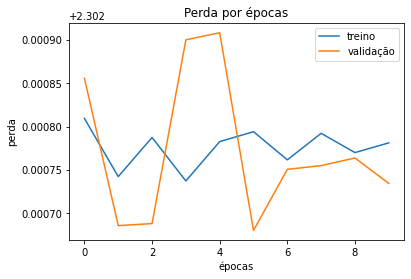

In [29]:
#Histórico em gráfico da rede
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [11]:
#Testando o modelo
testes = modelo.predict(imagens_teste)
print('Resultado teste:', np.argmax(testes[0]))
print('Número da imagem de teste:', identificacaoes_teste[1])

Resultado teste: 9
Número da imagem de teste: 2


In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacaoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 255907.2188 - accuracy: 0.2364
Perda do teste: 255907.21875
Acurácia do teste: 0.23639999330043793
